In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import graphviz
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [4]:
trn_file = './input/train.csv'
tst_file = './input/test.csv'
sample_file = './input/sample_submission.csv'

target_col = 'class'
seed = 42

In [5]:
algo_name = 'dt'
feature_name = 'j1'
model_name = f'{algo_name}_{feature_name}'

sub_file = f'{model_name}.csv'

In [6]:
trn = pd.read_csv(trn_file, index_col=0)
tst = pd.read_csv(tst_file, index_col=0)
y = trn[target_col]
trn.drop(target_col, axis=1, inplace=True)
print(y.shape, trn.shape, tst.shape)
trn.head()

(320000,) (320000, 18) (80000, 18)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941


# Scikit-Learn (sklearn)
- Python 대표 오픈 소스 ML라이브러리
- 2007년 David Cournapeau 가 Google Summer of Code 프로젝트로 시작
- 2010년 INRIA팀이 운영권을 맡아 v0.1 공개
- 분기별 릴리즈. 2020년 8월 v0.23.2 공개
- 각종 ML 알고리즘, 변수 변환, 메트릭 구현
- Pandas, NumPy, Matplotlib와 호환

- Regression

```python
from sklearn.linear_model import LinearRegression  

lr = LinearRegression()  
lr.fit(X, y)  #독립변수 X, 종속변수 y  
p = lr.predict(X)  #범주 예측 시   
```

- Classification

```python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1] #범주의 소속 될 확률을 예측 시
```

In [7]:
# Clustering

from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
             [10, 2], [10, 4], [10, 0]])
kmeans =KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)

kmeans.predict([[0, 0], [12, 3]])


[1 1 1 0 0 0]


array([1, 0])

- 가장 많이 사용되는 API

```python
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
```

# Scikit-Learn - 변수 변환

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X = scaler.fit_transform(dataFrame[num_cols])
```

- 수치형 변수 변환

```python
from sklearn.preprocessing import MinMaxScaler    
from sklearn.preprocessing import StandardScaler   
from sklearn.preprocessing import RobustScaler # 아웃라이어에 덜 영향을 받는 Scaler   
from sklearn.preprocessing import QuantileTransformer # 퍼센티지 별 변수 변환   
from sklearn.preprocessing import PowerTransformer # 멱함수 분포에 수치형 변수를 정규 분포에 가깝에 변환   
```

- 범주형 변수 변환

```python
from sklearn.preprocessing import LabelEncoder  # 각각의 변수에 범주를 숫자로 변환 (성별: 남-0, 여-1, 그외-2) 0부터 시작하는 레이블 할당  
from sklearn.preprocessing import OneHotEncoder # 각각의 범주값을 이진 변수로 변환해서 여러개의 이진 변수 메트릭 형태로 변환  
from sklearn.preprocessing import OrdinalEncoder # 범주형 변수 중에서 상하,높낮이 관계를 그대로 변환 (학력 : 초-0, 중-1, 고-2, 대-3) 
```

- 차원 감소 시

```python
from sklearn.decomposition import PCA # 
```

In [8]:
# Scikit-Learn - 변수 변환 (텍스트)
from sklearn.feature_extraction.text import TfidfVectorizer # 자연어 처리 시 많이 사용
# 모든 단어를 각각의 개별 변수로 만든 다음 각각의 단어가 몇번 나왔는지 횟수를 카운트 해서 변수로 사용 
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer =CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())
print()

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(X2.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]

['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


# Scikit-Learn - 메트릭

- classification

```python
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score, confusion_matrix

confusion_matrix(y, np.argmax(p_val, axis=1)) # 실제값과 예측값이 각각의 클래스에 대해서 어떻게 다른지 보여줌

print(f'{accuracy_score(y, np.argmax(p_val, axis=1)) * 100:.4f}%') #실제값과 예측값의 accuracy가 몇프로인지 보여줌
```

- Regression

```python
from sklearn.metrics import mean_squared_errorq, mean_absolute_error, r2_score
```

 # Scikit-Learn - 검증

In [9]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.datasets import load_iris

X, y= load_iris(return_X_y=True)
print(X.shape, y.shape)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=.4, random_state=0)
print(X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape)

(150, 4) (150,)
(90, 4) (60, 4) (90,) (60,)


```python
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed) #교차 검증 KFold, StratifiedKFold 를 많이 사용

p_val = np.zeros((trn.shape[0], n_class))
p_tst = np.zeros((tst.shape[0], n_calss))
for i, (i_trn, i_val), in enumerate(cv.split(trn), 1):
    print(f'training model for CV #{i}')
    lgb_trn = lgb.Dataset(trn[i_trn], y[i_trn], feature_name=feature_name)
    lgb_val = lgb.Dataset(trn[i_val], y[i_val], feature_name=feature_name)
    
    clf = lgb.train(params,
                   lgb_trn,
                   num_boost_round=n_est,
                   early_stopping_rounds=n_stop,
                   valid_sets=lgb_val,
                   verbose_eval=100)
```

# 결정트리 (Decision Tress)
- 일련의 결정 규칙에 기반한 예측모델
- 분류학습과 회귀학습 모두 적용가능
- 해석이 용이함
- 스케일에 영향받지 않음
- 범주형 변수를 수치형으로 변환하지 않고 학습 가능
- Random Forests, GBM(XGBoost, LightGBM)의 기반이 되는 알고리즘

In [10]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [11]:
trn_file = './input/train.csv'
tst_file = './input/test.csv'
sample_file = './input/sample_submission.csv'

target_col = 'class'
seed = 42

In [12]:
algo_name = 'dt'
feature_name = 'j1'
model_name = f'{algo_name}_{feature_name}'

sub_file = f'{model_name}.csv'

In [13]:
trn = pd.read_csv(trn_file, index_col=0)
tst = pd.read_csv(tst_file, index_col=0)
y = trn[target_col]
trn.drop(target_col, axis=1, inplace=True)
print(y.shape, trn.shape, tst.shape)
trn.head()

(320000,) (320000, 18) (80000, 18)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941


In [14]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
clf.fit(trn, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [15]:
print(f'{accuracy_score(y, clf.predict(trn)) * 100:.4f}%')

88.8669%


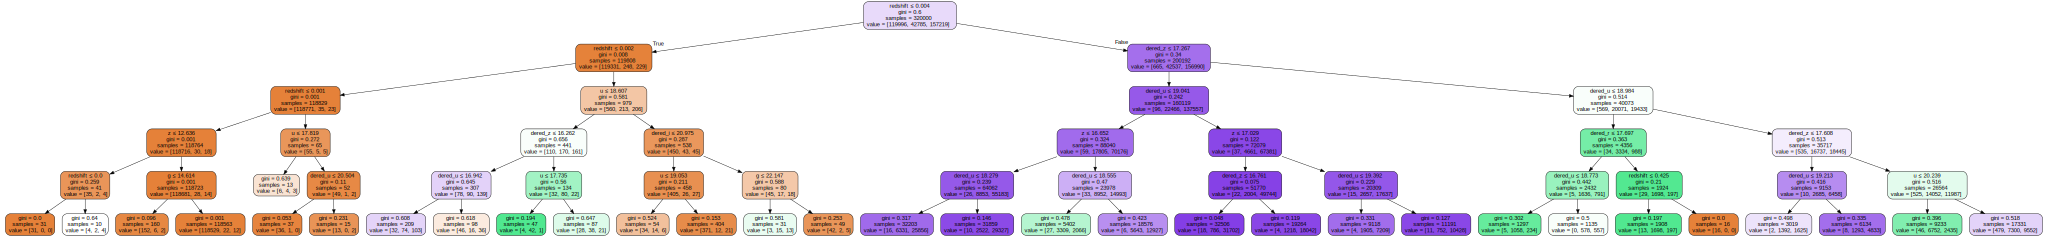

In [16]:
#pip install graphviz
#conda install graphviz
#'C:\Users\(유저이름)\Anaconda3\Library\bin\graphviz' 의 파일을 복사
#'C:\Users\(유저이름)\Anaconda3\Lib\site-packages\graphviz' 에다가 복붙. (덮어쓰기)
# graphviz-2.38.msi 설치
# 유저에 대한 환경변수(위쪽 칸)의 'path'에 'C:\Program Files (x86)\Graphviz2.38\bin' 를 추가하고 시스템 변수(아래 칸)엔 다음을 추가한다.
# 변수이름 : GRAPHVIZ_DOT
# 변수값 : C:\Program Files (x86)\Graphviz2.38\bin\dot.exe

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=trn.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 